In [ ]:
import pandas  as pd
import os
from sklearn.metrics import cohen_kappa_score,confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
test_case = "Sample_SN048_A121573_Rep2"
save_dir = '../../../../results/practical_sessions_test/'+test_case+'/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
column_in_gt = "Pathologist Annotations"
column_in_pred = "Model Prediction"

# mapping between lables 
label_mapping = {
    'Lamina propria':'lam propria',
    'Tumor':'tumor',
    'Tumor Strp,a IC med high':'tumor&stroma_IC med to high',
    'epithelium laminpa propria':'epithelium&lam propria',
    'exclude':'exclude',
    'non neo epithelium':'non neo epithelium',
    'stroma fibro':'stroma_fibroblastic_IC high',
    }

# for display purposes
abreviations = {
    'lam propria': 'lam_prop',
    'tumor': 'Tumor',
    'tumor&stroma_IC med to high': 'tumor&stroma',
    'epithelium&lam propria': 'epi_lam_prop',
    'exclude': 'exclude',
    'non neo epithelium': 'non_neo_epi',
    'stroma_fibroblastic_IC high': 'stroma_fibro',
}



In [4]:
base_path = "../../../../data/ColorectalCancer/Sample_SN048_A121573_Rep2/Annotation_experiment/UNI_rep_0/unc_Least_confidence_sampling_diversity_computed_features_cw_ICF_im_norm_0_ge_norm_0/"
gt_path = "../../../../data/ColorectalCancer/Sample_SN048_A121573_Rep2/PathologistAnnotations.csv"

# load the ground truth
gt = pd.read_csv(gt_path, index_col=0)



pred_without_correction = []
pred_with_correction = []
final_predictions = []
provided_annotations = []
for file in os.listdir(base_path):
    if file.startswith('Model_predictions') and 'no_trainingset' in file: # taking not corrected predictions to have consistent results
        pred_without_correction.append(file)
    if file.startswith('Model_predictions') and 'no_trainingset' not in file: # taking corrected predictions to have consistent results
        pred_with_correction.append(file)
    if file.startswith('Final_'):
        final_predictions.append(file)
    if file.startswith('TrainingAnnotations'):
        provided_annotations.append(file)


# sort the list of predictions
pred_without_correction.sort(reverse=False)
pred_with_correction.sort(reverse=False)
final_predictions.sort(reverse=False)
provided_annotations.sort(reverse=False)
# move the first annotation to the end
provided_annotations.append(provided_annotations.pop(0))

print(pred_without_correction)
print(pred_with_correction)
print(final_predictions)
print(provided_annotations)

    


['Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation__no_trainingset_predictions_corrected_2025-03-04_15-08-31.csv', 'Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation__no_trainingset_predictions_corrected_2025-03-04_15-22-54.csv', 'Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation__no_trainingset_predictions_corrected_2025-03-04_15-43-11.csv', 'Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation__no_trainingset_predictions_corrected_2025-03-04_18-41-19.csv']
['Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation_2025-03-04_15-08-31.csv', 'Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation_2025-03-04_15-22-54.csv', 'Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation_2025-03-04_15-43-11.csv', 'Model_predictions_Sample_SN048_A121573_Rep2_Ines_annotation_2025-03-04_18-41-19.csv']
['Final_annottaions_after_ActiveVisium.csv']
['TrainingAnnotations.csv_2025-03-04_15-22-35.csv', 'TrainingAnnotations.csv_2025-03-04_15-42-44.csv', 'T

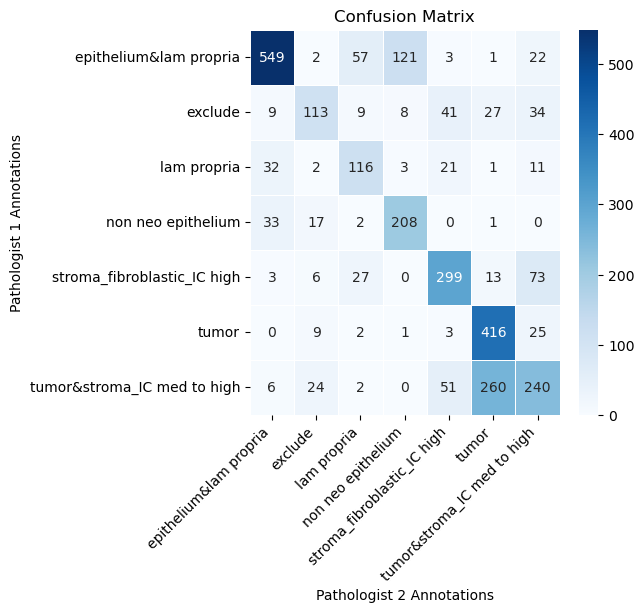

In [5]:
final_df = pd.read_csv(base_path+final_predictions[0], index_col=0)
final_df[column_in_pred] = final_df[column_in_pred].map(label_mapping)
common_indx = gt.index.intersection(final_df.index)

gt_df = gt.loc[common_indx]
pred_df = final_df.loc[common_indx]

labels = sorted(set(gt_df[column_in_gt]).union(set(pred_df[column_in_pred])))  # Ensure all labels are included
cm = confusion_matrix(gt_df[column_in_gt], pred_df[column_in_pred], labels=labels)

# Convert confusion matrix to a DataFrame for visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(5,5 ))
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues", linewidths=0.5)
plt.xlabel("Pathologist 2 Annotations")
plt.ylabel("Pathologist 1 Annotations")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()




In [6]:
# Compute the Cohen's Kappa score
kappa_score = cohen_kappa_score(gt_df[column_in_gt], pred_df[column_in_pred])
print(f"Cohen's Kappa: {kappa_score}")

Cohen's Kappa: 0.6032895581685799


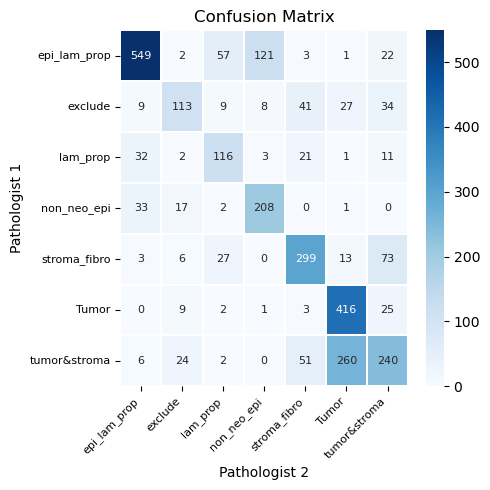

In [7]:
# Convert confusion matrix to a DataFrame for visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
# apply abreviations cm
cm_df = cm_df.rename(index=abreviations, columns=abreviations)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues", linewidths=0.3, annot_kws={"size": 8})
plt.xlabel("Pathologist 2")
plt.ylabel("Pathologist 1")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right",fontsize=8)
plt.yticks(rotation=0,fontsize=8)
# make tight layout
plt.tight_layout()
plt.savefig(save_dir+'confusion_matrix.png')
plt.show()
